<a href="https://colab.research.google.com/github/dyna-bytes/PyTorchIntensive/blob/main/5_2_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 변수의 shape, type, value 확인
def p(var,_str='') :
    if _str=='\n' or _str=='cr' :
        _str = '\n'
    else :
        print(f'[{_str}]:')
        _str = ''
    if type(var)!=type([]):
        try:
            print(f'Shape:{var.shape}')
        except :
            pass
    print(f'Type: {type(var)}')
    print(f'Values: {var}'+_str)

def pst(_x,_name=""):
    print(f'[{_name}] Shape{_x.shape}, {type(_x)}')
def ps(_x,_name=""):
    print(f'[{_name}] Shape{_x.shape}')

# RNN Model Architectures

---
```python
torch.nn.LSTM(
    input_size,        # The number of features in the input x
    hidden_size,       # The number of features in the hidden state h
    num_layers=1,      # Number of recurrent layers.
    bias=True,         # False: then the layer does not use bias weights.
    batch_first=False, # True: (batch, seq, feature), False: (seq, batch,feature)
    dropout=0, # Dropout layer on the outputs of each LSTM layer except the last layer
    bidirectional=False,# True: bidirectional LSTM
    proj_size=0        # If > 0, will use LSTM with projections of corresponding size.
)
```
---
```python
output,(h_n,c_n)= torch.nn.LSTM(...)(input,(h_0,c_0))
```
---

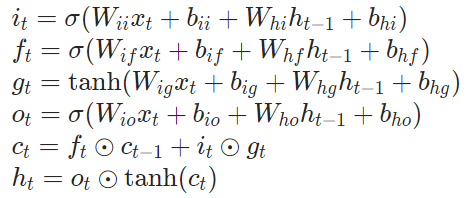

## 기본 특성

In [ ]:
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Neural Networks
import torch
import torch.nn as nn
from torchinfo import summary
torch.__version__

'2.0.1+cu118'

In [ ]:
x_dim = data_dim = features = 25
timesteps = sequence_length = 7
units = cells = 50

#### RNN layer의 특성

In [ ]:
batch_size = 1
inputs = torch.randn(batch_size, timesteps, features) #(1,7,25)
lstm = nn.LSTM(input_size=25,hidden_size=50, batch_first=True)
whole_seq_output, (h_T, c_T) = lstm(inputs)

In [ ]:
ps(whole_seq_output) #(1,7,50)
ps(h_T)              #(1,1,50)
ps(c_T)              #(1,1,50)

[] Shapetorch.Size([1, 7, 50])
[] Shapetorch.Size([1, 1, 50])
[] Shapetorch.Size([1, 1, 50])


In [ ]:
ps(lstm.weight_ih_l0) #(4*units,features)
ps(lstm.weight_hh_l0) #(4*units,units)

[] Shapetorch.Size([200, 25])
[] Shapetorch.Size([200, 50])


In [ ]:
lstm = nn.LSTM(input_size=features,hidden_size=units, proj_size=4)
ps(lstm.weight_ih_l0) #(4*units,features)
ps(lstm.weight_hh_l0) #(4*units,proj_size)

[] Shapetorch.Size([200, 25])
[] Shapetorch.Size([200, 4])


In [ ]:
batch_size = 1
inputs = torch.randn(batch_size, timesteps, features) #(1,7,25)
lstm = nn.LSTM(input_size=features,hidden_size=units, proj_size=4, batch_first=True)
whole_seq_output, (h_T, c_T) = lstm(inputs)
ps(whole_seq_output) #(1,7,4)
ps(h_T)              #(1,1,4)
ps(c_T)              #(1,1,50)

[] Shapetorch.Size([1, 7, 4])
[] Shapetorch.Size([1, 1, 4])
[] Shapetorch.Size([1, 1, 50])


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:812: UserWarning: LSTM with projections is not supported with oneDNN. Using default implementation. (Triggered internally at ../aten/src/ATen/native/RNN.cpp:1463.)
  result = _VF.lstm(input, hx, self._flat_weights, self.bias, self.num_layers,


#### one to one model

In [ ]:
inputs = torch.randn(batch_size, 1, features) #(1,1,25)
output, (_,_) = nn.LSTM(25,50, batch_first=True)(inputs)
ps(output) #(1,1,50)

[] Shapetorch.Size([1, 1, 50])


In [ ]:
inputs = torch.randn(batch_size, features) #(1,25)
output = nn.Linear(25, 50)(inputs)
ps(output) #(1,50)

[] Shapetorch.Size([1, 50])


In [ ]:
########## one to one model ##########
# time step이 1인 경우
batch_size=1
input_1 = torch.randn(batch_size, 1, features)
class OneToOneLSTM(nn.Module):
    def __init__(self, features, units, batch_first=False):
        super(OneToOneLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size=features,
                            hidden_size=units,
                            batch_first=batch_first)
    def forward(self, x):
        out, (hn, cn) = self.lstm(x)
        return out

model = OneToOneLSTM(features, units, batch_first=True)
output = model(input_1)
ps(output) #(1,1,50)

[] Shapetorch.Size([1, 1, 50])


In [ ]:
summary(model, input_size=(batch_size, 1, features))

Layer (type:depth-idx)                   Output Shape              Param #
OneToOneLSTM                             [1, 1, 50]                --
├─LSTM: 1-1                              [1, 1, 50]                15,400
Total params: 15,400
Trainable params: 15,400
Non-trainable params: 0
Total mult-adds (M): 0.02
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.06
Estimated Total Size (MB): 0.06

### Model 구조 보기
- torch.onnx.export() API로 모델 저장후 netron으로 읽어 시각화
- PC or Browser version netron  install
- -> https://github.com/gaussian37/netron
- Netron is a viewer for neural network, deep learning, and machine learning models.

In [ ]:
## 모델구조(data flow)를 볼 수 있는 라이브러리 설치
!pip install onnx
#!netron model.onnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 54.3 MB/s eta 0:00:00


In [ ]:
device = 'cuda:0'
torch.onnx.export(model, input_1.to(device), 'OneToOneLSTM_batch_first.onnx')

============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



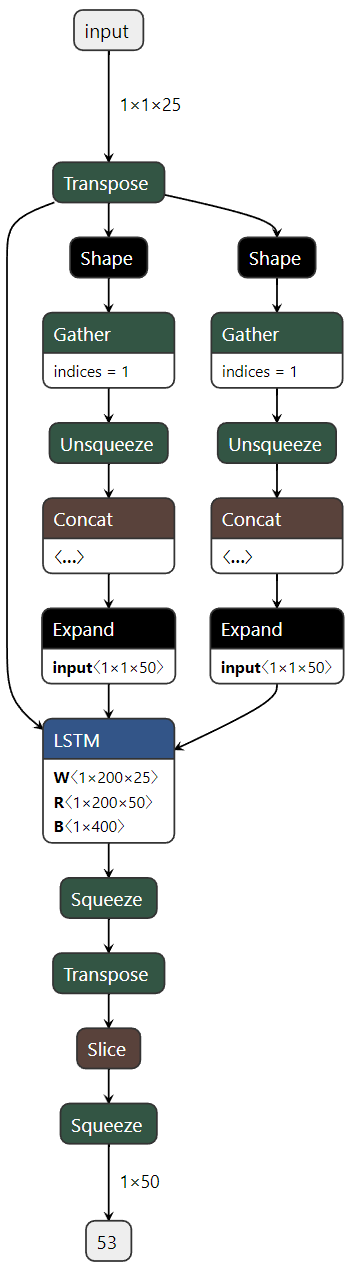

### batch_first=Flase
인 경우 (& batch_size=2)

In [ ]:
########## one to one model ##########
# time step이 1인 경우
batch_size=2
batch_first=False #(timesteps, batch_size, features)

input_1 = torch.randn(1, batch_size, features)
class OneToOneLSTM(nn.Module):
    def __init__(self, features, units, batch_first=False):
        super(OneToOneLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size=features,
                            hidden_size=units,
                            batch_first=batch_first)
    def forward(self, x):
        out, (hn, cn) = self.lstm(x)
        return out

model = OneToOneLSTM(features, units) #(ts, bs, features)
output = model(input_1)
ps(output) #(1,2,50)

[] Shapetorch.Size([1, 2, 50])


In [ ]:
summary(model, input_size=(1, batch_size, features))

Layer (type:depth-idx)                   Output Shape              Param #
OneToOneLSTM                             [1, 2, 50]                --
├─LSTM: 1-1                              [1, 2, 50]                15,400
Total params: 15,400
Trainable params: 15,400
Non-trainable params: 0
Total mult-adds (M): 0.03
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.06
Estimated Total Size (MB): 0.06

In [ ]:
torch.onnx.export(model, input_1.to(device), 'OneToOneLSTM.onnx')

============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



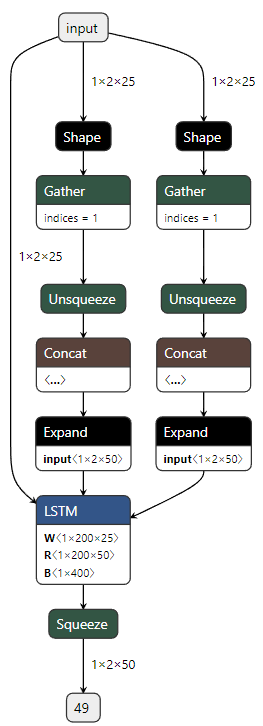

# 입출력을 중심으로

## many to many

In [ ]:
########## many to many ##########
batch_size=2
inputs = torch.randn(batch_size, timesteps, features)
class ManyToManyLSTM(nn.Module):
    def __init__(self, features, units, batch_first=True):
        super(ManyToManyLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size=features,
                            hidden_size=units,
                            batch_first=batch_first)
    def forward(self, x):
        out, (hn, cn) = self.lstm(x)
        return out

model = ManyToManyLSTM(features, units)
output = model(inputs)
output.shape #(2,7,50)

torch.Size([2, 7, 50])

In [ ]:
summary(model, input_size=(batch_size, timesteps, features))

Layer (type:depth-idx)                   Output Shape              Param #
ManyToManyLSTM                           [2, 7, 50]                --
├─LSTM: 1-1                              [2, 7, 50]                15,400
Total params: 15,400
Trainable params: 15,400
Non-trainable params: 0
Total mult-adds (M): 0.22
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.06
Estimated Total Size (MB): 0.07

In [ ]:
torch.onnx.export(model, inputs.to(device), 'ManyToManyLSTM.onnx')

============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



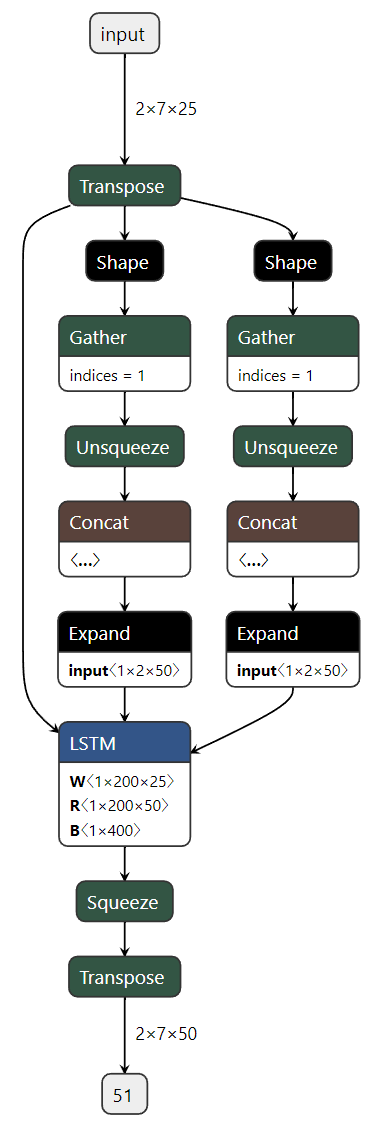

## many to one

In [ ]:
########## many to one ##########
inputs = torch.randn(batch_size, timesteps, features)
class ManyToOneLSTM(nn.Module):
    def __init__(self, features, units):
        super(ManyToOneLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size=features, hidden_size=units)

    def forward(self, x):
        out, (hn, cn) = self.lstm(x) #(2,7,50)
        return out[:, -1, :] #(2,50)

model = ManyToOneLSTM(features, units)
output = model(inputs) #(2,50)

summary(model, input_size=(batch_size, timesteps, features))

Layer (type:depth-idx)                   Output Shape              Param #
ManyToOneLSTM                            [2, 50]                   --
├─LSTM: 1-1                              [2, 7, 50]                15,400
Total params: 15,400
Trainable params: 15,400
Non-trainable params: 0
Total mult-adds (M): 0.22
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.06
Estimated Total Size (MB): 0.07

In [ ]:
torch.onnx.export(model, inputs.to(device), 'ManyToOneLSTM.onnx')

============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



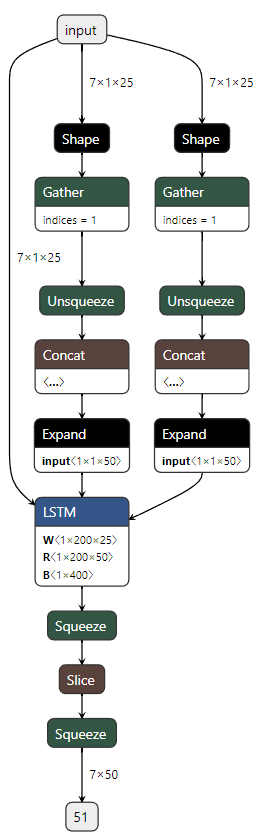

##  many to many : TimeDistributed


**contiguous / non-contiguous tensor**
https://stackoverflow.com/questions/26998223/what-is-the-difference-between-contiguous-and-non-contiguous-arrays

In [ ]:
## contiguous vs. non-contiguous tensor
import numpy as np
a = torch.tensor(np.arange(12).reshape(3,4))
av = a.view(4,3)
at = a.T
att = at.T
ar = at.reshape(3,4)
arr = ar.reshape(4,3)
ap = at.permute(1,0)
app = ap.permute(1,0)

avv = av.view(3,4)
acv = at.contiguous().view(3,4)

## error!! non-contiguous tensor
#av = at.view(3,4)

#print(a) #print(av) #print(at) #print(att)
#print(ap) #print(app) #print(avv) #print(acv) #print(av)

In [ ]:
########## many to many : TimeDistributed-1 ##########
class TimeDistributed(nn.Module):
    def __init__(self, module, batch_first=False):
        super(TimeDistributed, self).__init__()
        self.module = module
        self.batch_first = batch_first
    def forward(self, x):
        if len(x.size()) <= 2:
            return self.module(x)
        y = self.module(x[:,0,:]).reshape(x.size(0),1,-1) #(2,1,1)
        for i in range(x.size()[1]-1): #(2,7,1) <- cat((2,1,1),dim=1)
          y = torch.cat((y,self.module(x[:,i+1,:]).\
                         reshape(x.size(0),1,-1)),dim=1)
        if not  self.batch_first:
            y = y.transpose(0,1).contiguous() #(7,2,1)
        return y

batch_size = 2
class ManyToMany(nn.Module):
    def __init__(self, features, units, batch_first=True):
        super(ManyToMany, self).__init__()
        self.lstm = nn.LSTM(features, units, batch_first=batch_first)
        self.timeDistributed = TimeDistributed(nn.Linear(units, 1),
                                               batch_first=batch_first)

    def forward(self, x):
        output, (h_T, c_T) = self.lstm(x) #(2,7,50)
        y = self.timeDistributed(output)  #(2,7,1)
        return y

inputs = torch.randn(batch_size, timesteps, features)

model = ManyToMany(features, units)
whole_seq_output = model(inputs) #(2,7,1)<-(2,7,25)

summary(model, input_size=(batch_size, timesteps, features))

Layer (type:depth-idx)                   Output Shape              Param #
ManyToMany                               [2, 7, 1]                 --
├─LSTM: 1-1                              [2, 7, 50]                15,400
├─TimeDistributed: 1-2                   [2, 7, 1]                 --
│    └─Linear: 2-1                       [2, 1]                    51
│    └─Linear: 2-2                       [2, 1]                    (recursive)
│    └─Linear: 2-3                       [2, 1]                    (recursive)
│    └─Linear: 2-4                       [2, 1]                    (recursive)
│    └─Linear: 2-5                       [2, 1]                    (recursive)
│    └─Linear: 2-6                       [2, 1]                    (recursive)
│    └─Linear: 2-7                       [2, 1]                    (recursive)
Total params: 15,451
Trainable params: 15,451
Non-trainable params: 0
Total mult-adds (M): 0.22
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size

In [ ]:
#torch.onnx.export(model, inputs, 'graph_many2one.onnx')

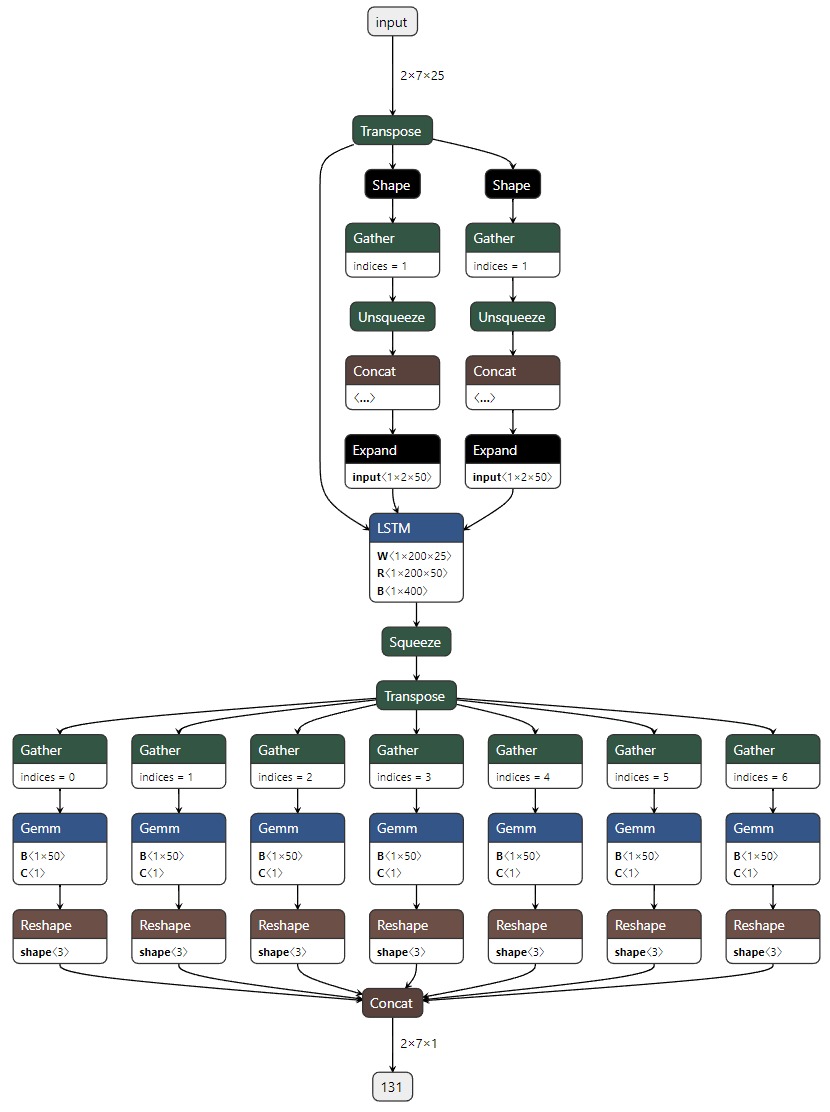

Impicit TimeDistributed

In [ ]:
batch_size = 2
class ManyToMany(nn.Module):
    def __init__(self, features, units, batch_first=True):
        super(ManyToMany, self).__init__()
        self.lstm = nn.LSTM(features, units, batch_first=batch_first)
        self.linear = nn.Linear(units, 1)

    def forward(self, x):
        output, (h_T, c_T) = self.lstm(x) #(2,7,50)
        y = self.linear(output)  #(2,7,1)
        return y

inputs = torch.randn(batch_size, timesteps, features)

model = ManyToMany(features, units)
whole_seq_output = model(inputs) #(2,7,1)<-(2,7,25)

summary(model, input_size=(batch_size, timesteps, features))

Layer (type:depth-idx)                   Output Shape              Param #
ManyToMany                               [2, 7, 1]                 --
├─LSTM: 1-1                              [2, 7, 50]                15,400
├─Linear: 1-2                            [2, 7, 1]                 51
Total params: 15,451
Trainable params: 15,451
Non-trainable params: 0
Total mult-adds (M): 0.22
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.06
Estimated Total Size (MB): 0.07

In [ ]:
########## many to many : TimeDistributed-2 ##########
batch_size = 2
class ManyToMany(nn.Module):
    def __init__(self, features, units, batch_first=True):
        super(ManyToMany, self).__init__()
        self.timeDistributed = TimeDistributed(nn.Linear(features, features),
                                               batch_first=batch_first)
        self.lstm = nn.LSTM(features, units, batch_first=batch_first)
        self.linear = nn.Linear(units,1)
    def forward(self, x):
        output = self.timeDistributed(x)  #(2,7,25)<-(2,7,25)
        output, (h_T, c_T) = self.lstm(output) #(2,7,50)
        output = self.linear(output) #(2,7,1)
        return output

inputs = torch.randn(batch_size, timesteps, features)

model = ManyToMany(features, units)
whole_seq_output = model(inputs) #(2,7,1)<-(2,7,25)

summary(model, input_size=(batch_size, timesteps, features))

Layer (type:depth-idx)                   Output Shape              Param #
ManyToMany                               [2, 7, 1]                 --
├─TimeDistributed: 1-1                   [2, 7, 25]                --
│    └─Linear: 2-1                       [2, 25]                   650
│    └─Linear: 2-2                       [2, 25]                   (recursive)
│    └─Linear: 2-3                       [2, 25]                   (recursive)
│    └─Linear: 2-4                       [2, 25]                   (recursive)
│    └─Linear: 2-5                       [2, 25]                   (recursive)
│    └─Linear: 2-6                       [2, 25]                   (recursive)
│    └─Linear: 2-7                       [2, 25]                   (recursive)
├─LSTM: 1-2                              [2, 7, 50]                15,400
├─Linear: 1-3                            [2, 7, 1]                 51
Total params: 16,101
Trainable params: 16,101
Non-trainable params: 0
Total mult-adds (M): 0.22


In [ ]:
torch.onnx.export(model, inputs.to(device), 'graph_many2one2.onnx')

============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



/usr/local/lib/python3.10/dist-packages/torch/onnx/symbolic_opset9.py:4476: UserWarning: Exporting a model to ONNX with a batch_size other than 1, with a variable length with LSTM can cause an error when running the ONNX model with a different batch size. Make sure to save the model with a batch size of 1, or define the initial states (h0/c0) as inputs of the model. 
  warnings.warn(


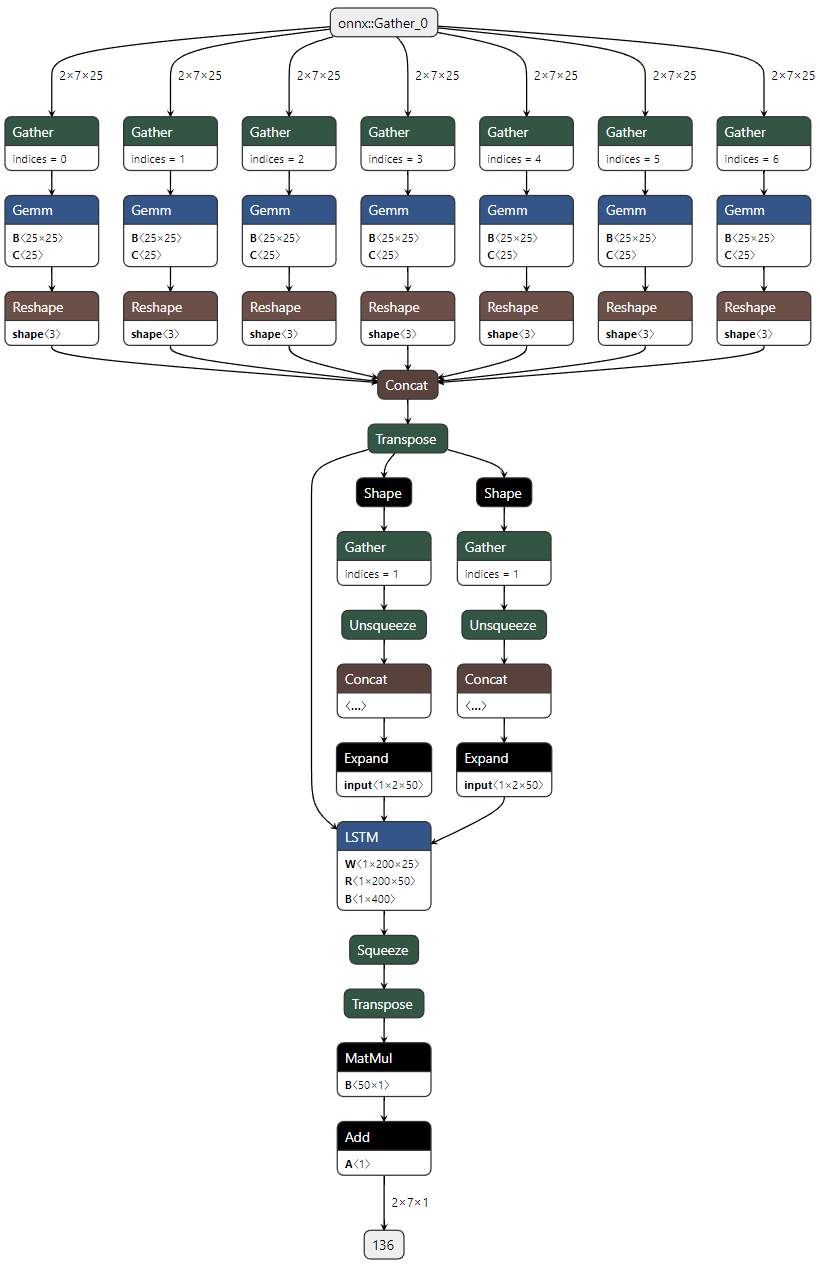

Impicit TimeDistributed

In [ ]:
class ManyToMany(nn.Module):
    def __init__(self, features, units, batch_first=True):
        super(ManyToMany, self).__init__()
        self.linear1 = nn.Linear(features, features)
        self.lstm = nn.LSTM(features, units, batch_first=batch_first)
        self.linear2 = nn.Linear(units,1)
    def forward(self, x):
        output = self.linear1(x)  #(2,7,25)<-(2,7,25)
        output, (h_T, c_T) = self.lstm(output) #(2,7,50)
        output = self.linear2(output) #(2,7,1)
        return output

model = ManyToMany(features, units)
whole_seq_output = model(inputs) #(2,7,1)<-(2,7,25)

summary(model, input_size=(batch_size, timesteps, features))

Layer (type:depth-idx)                   Output Shape              Param #
ManyToMany                               [2, 7, 1]                 --
├─Linear: 1-1                            [2, 7, 25]                650
├─LSTM: 1-2                              [2, 7, 50]                15,400
├─Linear: 1-3                            [2, 7, 1]                 51
Total params: 16,101
Trainable params: 16,101
Non-trainable params: 0
Total mult-adds (M): 0.22
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.06
Estimated Total Size (MB): 0.07

In [ ]:
torch.onnx.export(model, inputs.to(device), 'graph_many2one2-I.onnx')

============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



## many to many : LSTM AutoEncoder & torch.repeat()

In [ ]:
########### LSTM AutoEncoder ############
latent_dim = 4
class Many2ManyRepeated(nn.Module):
    def __init__(self, features, latent_dim, batch_first=True):
        super(Many2ManyRepeated, self).__init__()
        self.encoder = nn.LSTM(features, latent_dim,
                               batch_first=batch_first)
        self.decoder = nn.LSTM(latent_dim, features,
                               batch_first=batch_first)
    def forward(self, x):
        encoded, _ = self.encoder(x) #(2,7,4)<-(2,7,25)
        decoder_input = encoded[:, -1:, :].repeat(1, timesteps, 1) #(2,7,4)<(2,1,4)
        decoded, _ = self.decoder(decoder_input) #(2,7,25)<-(2,7,4)
        return decoded

inputs = torch.randn(batch_size, timesteps, features)

model = Many2ManyRepeated(features, latent_dim)
output = model(inputs) #(2,7,25) <- (2,7,25)

summary(model, input_size=(batch_size, timesteps, features))

Layer (type:depth-idx)                   Output Shape              Param #
Many2ManyRepeated                        [2, 7, 25]                --
├─LSTM: 1-1                              [2, 7, 4]                 496
├─LSTM: 1-2                              [2, 7, 25]                3,100
Total params: 3,596
Trainable params: 3,596
Non-trainable params: 0
Total mult-adds (M): 0.05
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.01
Estimated Total Size (MB): 0.02

In [ ]:
#torch.onnx.export(model, inputs, 'Many2ManyRepeated.onnx')

# 레이어 구조를 중심으로

#### Parallel LSTM

In [ ]:
features = 20
L_units = 6

class ParallelLSTM(nn.Module):
    def __init__(self, features, units, l_units, batch_first=True):
        super(ParallelLSTM, self).__init__()
        self.lstm1 = nn.LSTM(int(features/2), units,
                             batch_first=batch_first)
        self.lstm2 = nn.LSTM(int(features/2), units,
                             batch_first=batch_first)
        self.linear = nn.Linear(units*2, l_units) #()

    def forward(self, x):
        input1 = x[:, :, :int(features/2)] #(2,7,10)
        input2 = x[:, :, int(features/2):] #(2,7,10)

        output1, _ = self.lstm1(input1)    #(2,7,50)
        output2, _ = self.lstm2(input2)    #(2,7,50)
        concat = torch.cat([output1, output2], dim=-1)#(2,7,100)

        output = self.linear(concat) #(2,7,6)<-(2,7,100)
        output = torch.tanh(output)
        return output

inputs = torch.randn(batch_size, timesteps, features)

model = ParallelLSTM(features, units, L_units)
output = model(inputs) #(2,7,6)<-(20,50,6)

summary(model, input_size=(batch_size, timesteps, features))

Layer (type:depth-idx)                   Output Shape              Param #
ParallelLSTM                             [2, 7, 6]                 --
├─LSTM: 1-1                              [2, 7, 50]                12,400
├─LSTM: 1-2                              [2, 7, 50]                12,400
├─Linear: 1-3                            [2, 7, 6]                 606
Total params: 25,406
Trainable params: 25,406
Non-trainable params: 0
Total mult-adds (M): 0.35
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.10
Estimated Total Size (MB): 0.11

In [ ]:
#torch.onnx.export(model, inputs, 'ParallelLSTM.onnx')

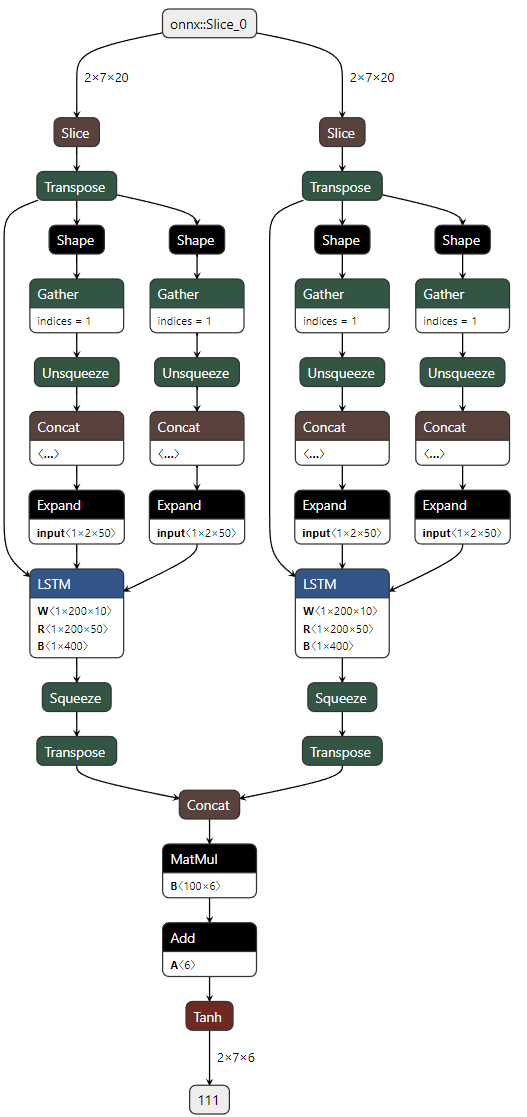

#### Stacked LSTM

In [ ]:
##### Stacked LSTM-1 #####
class StackedLSTM(nn.Module):
    def __init__(self, features, units, batch_first=True):
        super(StackedLSTM, self).__init__()
        self.lstm1 = nn.LSTM(features, units,
                             batch_first=batch_first)
        self.lstm2 = nn.LSTM(units, units,
                             batch_first=batch_first)
        self.linear = nn.Linear(units, 1)
    def forward(self, x):
        x, _ = self.lstm1(x)   #(2,7,50)
        x = torch.relu(x)
        x, _ = self.lstm2(x)   #(2,7,50)
        x = torch.relu(x)
        output = self.linear(x)#(2,7,1)
        return output

inputs = torch.randn(batch_size,timesteps,features)

model = StackedLSTM(features, units)
output = model(inputs) #(2,7,1)

summary(model, input_size=(batch_size, timesteps, features))

Layer (type:depth-idx)                   Output Shape              Param #
StackedLSTM                              [2, 7, 1]                 --
├─LSTM: 1-1                              [2, 7, 50]                14,400
├─LSTM: 1-2                              [2, 7, 50]                20,400
├─Linear: 1-3                            [2, 7, 1]                 51
Total params: 34,851
Trainable params: 34,851
Non-trainable params: 0
Total mult-adds (M): 0.49
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.14
Estimated Total Size (MB): 0.15

In [ ]:
#torch.onnx.export(model, inputs, 'StackedLSTM.onnx')

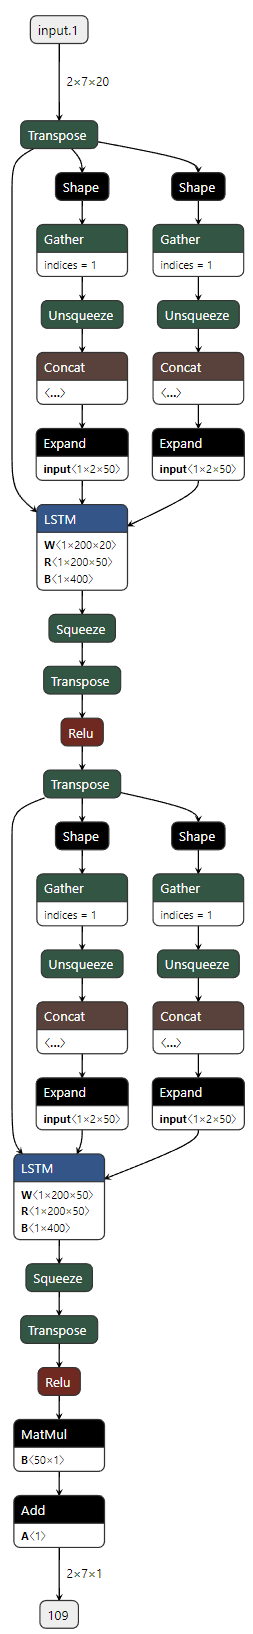

In [ ]:
##### Stacked LSTM-2 #####
class StackedLSTM(nn.Module):
    def __init__(self, features, units, batch_first=True):
        super(StackedLSTM, self).__init__()
        self.lstm1 = nn.LSTM(features, units,
                             num_layers=2, ##
                             batch_first=batch_first)
        self.linear = nn.Linear(units, 1)
    def forward(self, x):
        x, _ = self.lstm1(x)
        x = torch.relu(x)
        output = self.linear(x)
        return output

inputs = torch.randn(batch_size,timesteps,features)

model = StackedLSTM(features, units)
output = model(inputs)

summary(model, input_size=(batch_size, timesteps, features))

Layer (type:depth-idx)                   Output Shape              Param #
StackedLSTM                              [2, 7, 1]                 --
├─LSTM: 1-1                              [2, 7, 50]                34,800
├─Linear: 1-2                            [2, 7, 1]                 51
Total params: 34,851
Trainable params: 34,851
Non-trainable params: 0
Total mult-adds (M): 0.49
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.14
Estimated Total Size (MB): 0.15

In [ ]:
#torch.onnx.export(model, inputs, 'StackedLSTM2.onnx')

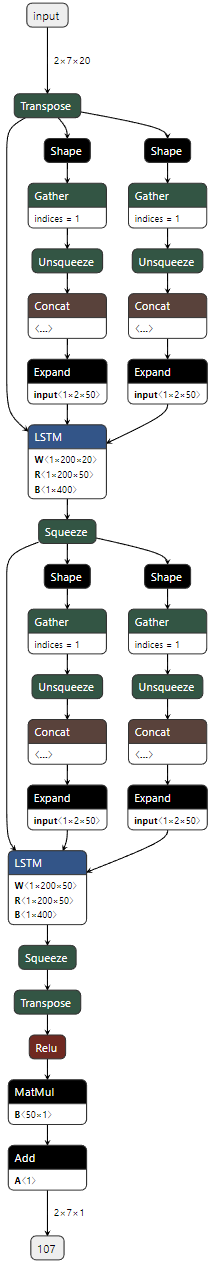

#### Bidirectional LSTM

In [ ]:
##### Bidirectional LSTM #####
class BidirectionalLSTMManyToMany(nn.Module):
    def __init__(self, features, units, batch_first=True):
        super(BidirectionalLSTMManyToMany, self).__init__()
        self.biLstm = nn.LSTM(features, units,
                              bidirectional=True, ##
                              batch_first=batch_first)
        self.linear = nn.Linear(units*2, 1)
    def forward(self, x):
        out, (hn, cn) = self.biLstm(x)
        x = self.linear(out)            # (2,7,1)<-(2,7,100)
#        x = self.linear(out[:, -1, :]) #(2,1)<-(2,100)
        return x

model = BidirectionalLSTMManyToMany(features, units)
output = model(inputs)

summary(model, input_size=(batch_size, timesteps, features))

Layer (type:depth-idx)                   Output Shape              Param #
BidirectionalLSTMManyToMany              [2, 7, 1]                 --
├─LSTM: 1-1                              [2, 7, 100]               28,800
├─Linear: 1-2                            [2, 7, 1]                 101
Total params: 28,901
Trainable params: 28,901
Non-trainable params: 0
Total mult-adds (M): 0.40
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.12
Estimated Total Size (MB): 0.13

In [ ]:
#torch.onnx.export(model, inputs, 'BidirectionalLSTM.onnx')

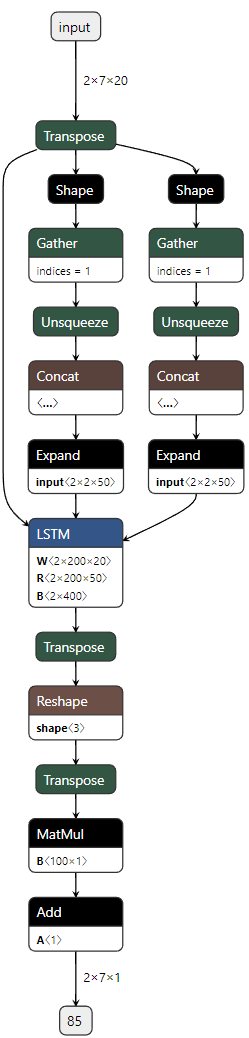

## Seq2Seq model
https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html